In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from util import transform_data, cat_to_num_plot
import util
from sklearn.preprocessing import StandardScaler

In [2]:
# file paths
customers_file = "./customers (4).csv"
non_customers_file = "./noncustomers (4).csv"
activity_file = "./usage_actions (4).csv"


In [3]:
# Read individual files
customers_df = pd.read_csv(customers_file)
non_customers_df = pd.read_csv(non_customers_file)

# Read the combined activity file. Check STEP 1 Notebook
all_activity_df = util.transform_data(customers_file,non_customers_file,activity_file)

In [4]:
all_activity_df.head()

,id,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,MRR,DATE,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,LASTUSED,MEMBERSHIPTYPE
0,199,309343.0,201 to 1000,Other,290.0,2019-01-07,61.0,0.0,0.0,7.0,10.0,0.0,0.0,4.0,0,BEFORE-PREMIUM
1,199,309343.0,201 to 1000,Other,290.0,2019-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,BEFORE-PREMIUM
2,199,309343.0,201 to 1000,Other,290.0,2019-01-21,21.0,0.0,0.0,33.0,6.0,0.0,0.0,6.0,0,BEFORE-PREMIUM
3,199,309343.0,201 to 1000,Other,290.0,2019-01-28,108.0,0.0,3.0,74.0,9.0,0.0,1.0,10.0,0,BEFORE-PREMIUM
4,199,309343.0,201 to 1000,Other,290.0,2019-02-04,114.0,0.0,5.0,58.0,10.0,0.0,2.0,9.0,0,BEFORE-PREMIUM


In [5]:
# drop id=119, as it has outliers
#customers_df[customers_df["id"]==119]

In [6]:
#all_activity_df.drop(all_activity_df[all_activity_df["id"]==119].index, inplace=True)

In [7]:
all_activity_df.columns

Index(['id', 'ALEXA_RANK', 'EMPLOYEE_RANGE', 'INDUSTRY', 'MRR', 'DATE',
       'ACTIONS_CRM_CONTACTS', 'ACTIONS_CRM_COMPANIES', 'ACTIONS_CRM_DEALS',
       'ACTIONS_EMAIL', 'USERS_CRM_CONTACTS', 'USERS_CRM_COMPANIES',
       'USERS_CRM_DEALS', 'USERS_EMAIL', 'LASTUSED', 'MEMBERSHIPTYPE'],
      dtype='object')

In [8]:
all_activity_numeric = all_activity_df[['ACTIONS_CRM_CONTACTS', 'ACTIONS_CRM_COMPANIES', 'ACTIONS_CRM_DEALS',
       'ACTIONS_EMAIL', 'USERS_CRM_CONTACTS', 'USERS_CRM_COMPANIES',
       'USERS_CRM_DEALS', 'USERS_EMAIL', 'LASTUSED']]

In [9]:
## The std scaler is not giving good results for PCA

#std_scaler = StandardScaler()
#std_scaler.fit(all_activity_numeric)
#df = pd.DataFrame(std_scaler.transform(all_activity_numeric), columns=[['ACTIONS_CRM_CONTACTS', 'ACTIONS_CRM_COMPANIES', 'ACTIONS_CRM_DEALS',
#       'ACTIONS_EMAIL', 'USERS_CRM_CONTACTS', 'USERS_CRM_COMPANIES',
#       'USERS_CRM_DEALS', 'USERS_EMAIL', 'LASTUSED']])
df = all_activity_numeric

In [10]:
df.head()

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,LASTUSED
0,61.0,0.0,0.0,7.0,10.0,0.0,0.0,4.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,21.0,0.0,0.0,33.0,6.0,0.0,0.0,6.0,0
3,108.0,0.0,3.0,74.0,9.0,0.0,1.0,10.0,0
4,114.0,0.0,5.0,58.0,10.0,0.0,2.0,9.0,0


In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=42)
pca.fit(df)
print(pca.explained_variance_ratio_)

[7.27180189e-01 1.82171934e-01 7.19790637e-02 1.85306343e-02
 8.06922856e-05 3.76607757e-05 1.25632786e-05 6.70270646e-06
 5.60863316e-07]


In [12]:
np.array(pca.explained_variance_ratio_*100).cumsum()

array([ 72.71801885,  90.93521221,  98.13311858,  99.98618201,
        99.99425124,  99.99801732,  99.99927364,  99.99994391,
       100.        ])

,Component,Cumulative Explained Variance
0,1,72.718019
1,2,90.935212
2,3,98.133119
3,4,99.986182
4,5,99.994251
5,6,99.998017
6,7,99.999274
7,8,99.999944
8,9,100.000000


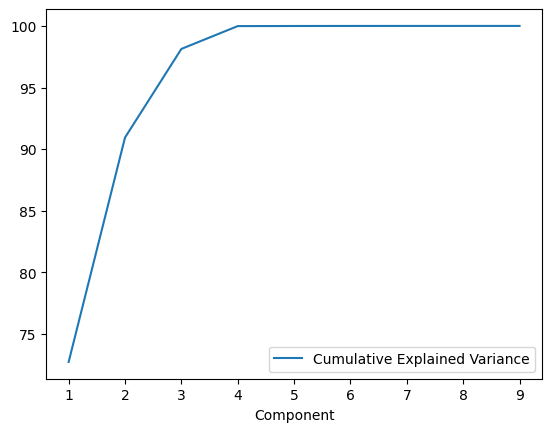

In [14]:
explained_variance_df = pd.DataFrame(zip(range(1, len(pca.explained_variance_ratio_)+1), np.array(pca.explained_variance_ratio_*100).cumsum()),
            columns=["Component", "Cumulative Explained Variance"])

explained_variance_df.plot.line(x = "Component", y= "Cumulative Explained Variance")
explained_variance_df

## Inference
* The first 3 PCA components are capturing almost 98% of the variance

Now fit the PCA with 3 components only.

In [15]:
pca = PCA(n_components=3,copy=True,random_state=42)
pca.fit(df)

# Transform the data using the fitted PCA
reduced_df = pca.transform(df)

In [16]:
reduced_df = pd.DataFrame(reduced_df, columns=["Dim_1", "Dim_2", "Dim_3"])

In [17]:
reduced_df

,Dim_1,Dim_2,Dim_3
0,51.201352,-111.636978,-13.894644
1,-9.995241,-107.260369,-9.890041
2,11.336828,-113.399198,-11.218017
3,98.345569,-109.867319,-13.211879
4,104.433707,-109.687441,-11.711898
...,...,...,...
155153,-10.543991,-93.295267,-9.124335
155154,-9.720866,-114.242920,-10.272894
155155,-9.995241,-107.260369,-9.890041
155156,-10.269616,-100.277818,-9.507188


In [18]:
reduced_df['MEMBERSHIPTYPE'] = list(all_activity_df['MEMBERSHIPTYPE'])
reduced_df['id'] = list(all_activity_df['id'])

In [19]:
reduced_df

,Dim_1,Dim_2,Dim_3,MEMBERSHIPTYPE,id
0,51.201352,-111.636978,-13.894644,BEFORE-PREMIUM,199
1,-9.995241,-107.260369,-9.890041,BEFORE-PREMIUM,199
2,11.336828,-113.399198,-11.218017,BEFORE-PREMIUM,199
3,98.345569,-109.867319,-13.211879,BEFORE-PREMIUM,199
4,104.433707,-109.687441,-11.711898,BEFORE-PREMIUM,199
...,...,...,...,...,...
155153,-10.543991,-93.295267,-9.124335,FREE,4011
155154,-9.720866,-114.242920,-10.272894,FREE,3104
155155,-9.995241,-107.260369,-9.890041,FREE,3104
155156,-10.269616,-100.277818,-9.507188,FREE,3104


In [20]:
colors = {'BEFORE-PREMIUM':'blue', 'FREE':'red', 'PREMIUM':'green'}


In [21]:
#reduced_df.plot.scatter(x="Dim_1", y = "Dim_2", c=reduced_df['MEMBERSHIPTYPE'].map(colors), 
#                        label=colors)

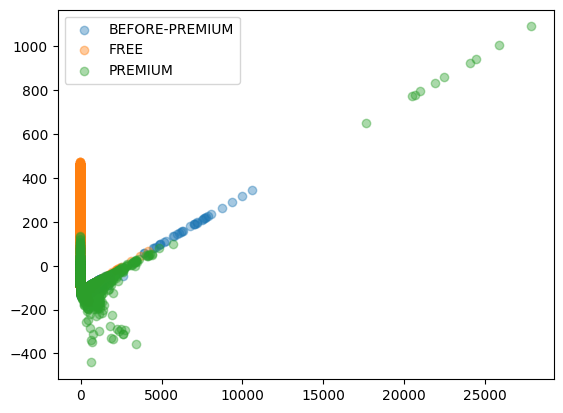

In [22]:
fig,ax = plt.subplots()
for k,d in reduced_df.groupby('MEMBERSHIPTYPE'):
    ax.scatter(d['Dim_1'], d['Dim_2'], label=k, alpha=0.4)
plt.legend(loc=2)
# plt.savefig('scatter.png')
plt.show()

### Inference
* There is a clear distinction between the three groups. 
* We should use clustering algorithm to cluster the data
* After clustering we can get the following insights:
    * Since we are NOT using MEMBERSHIPTYPE in the PCA, we can analyze how many user actions belong to a PREMIUM vs BEFORE-PAID vs FREE members
    * We can check the individual customers activity, and understand why they are classified (or mis-classified) into a specific cluster.
    * Finally the clusters can be used to identify existing PAID customers who are assigned to a cluster with most of the FREE members activity. Such customers may be at the verge of canceling their membership

### Clustering

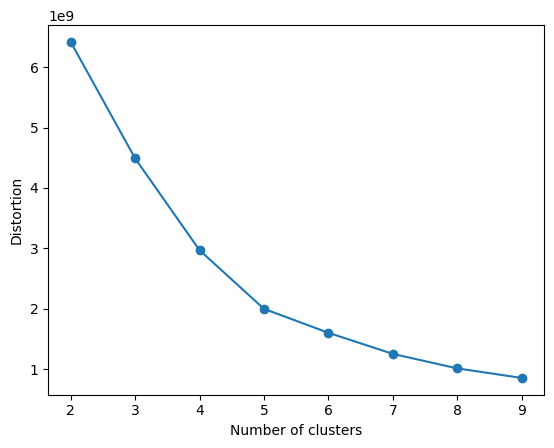

In [23]:
from sklearn.cluster import KMeans

distortions=[]
n_clusters=range(2,10)

for i in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=42)
    clusterer.fit(reduced_df[['Dim_1','Dim_2','Dim_3']])
    
    distortions.append(clusterer.inertia_)
    
plt.plot(n_clusters, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Inference
* We should use 4 clusters to cluster our data

In [24]:
clusterer = KMeans(n_clusters=4, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusterer.fit(reduced_df[['Dim_1', 'Dim_2', 'Dim_3']])


KMeans(n_clusters=4, random_state=0)

In [25]:
preds = clusterer.predict(reduced_df[['Dim_1', 'Dim_2', 'Dim_3']])
print(preds)
cluster_labels = np.unique(preds)
print(cluster_labels)
reduced_df['cluster'] = preds
reduced_df

[0 0 0 ... 0 0 0]
[0 1 2 3]


,Dim_1,Dim_2,Dim_3,MEMBERSHIPTYPE,id,cluster
0,51.201352,-111.636978,-13.894644,BEFORE-PREMIUM,199,0
1,-9.995241,-107.260369,-9.890041,BEFORE-PREMIUM,199,0
2,11.336828,-113.399198,-11.218017,BEFORE-PREMIUM,199,0
3,98.345569,-109.867319,-13.211879,BEFORE-PREMIUM,199,0
4,104.433707,-109.687441,-11.711898,BEFORE-PREMIUM,199,0
...,...,...,...,...,...,...
155153,-10.543991,-93.295267,-9.124335,FREE,4011,0
155154,-9.720866,-114.242920,-10.272894,FREE,3104,0
155155,-9.995241,-107.260369,-9.890041,FREE,3104,0
155156,-10.269616,-100.277818,-9.507188,FREE,3104,0


In [28]:
all_activity_df["Cluster"] = list(reduced_df["cluster"])

In [29]:
scaler = StandardScaler()
scaler.fit(reduced_df[["Dim_1", "Dim_2", "Dim_3"]])
reduced_df_scaled = scaler.transform(reduced_df[["Dim_1", "Dim_2", "Dim_3"]])


In [30]:
reduced_df_scaled = pd.DataFrame(reduced_df_scaled, columns=["Dim_1", "Dim_2", "Dim_3"])

<AxesSubplot: ylabel='Frequency'>

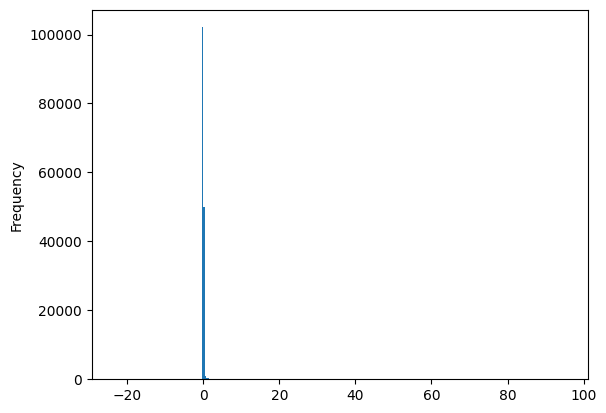

In [31]:
reduced_df_scaled["Dim_3"].plot.hist(bins=300)

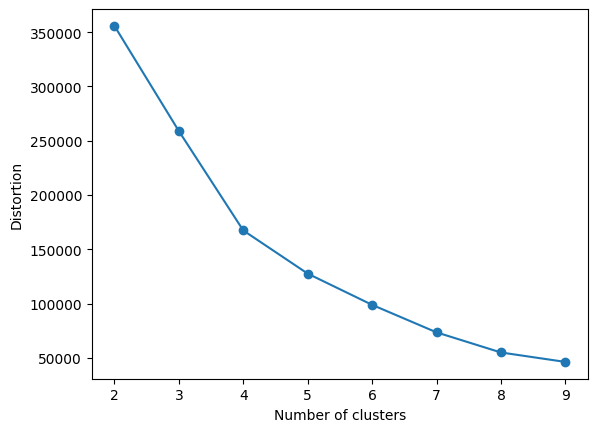

In [32]:
from sklearn.cluster import KMeans

distortions=[]
n_clusters=range(2,10)

for i in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=i, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=42)
    clusterer.fit(reduced_df_scaled[['Dim_1','Dim_2','Dim_3']])
    
    distortions.append(clusterer.inertia_)
    
plt.plot(n_clusters, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [33]:
clusterer_scaled = KMeans(n_clusters=4, init='k-means++',  n_init=10, max_iter=300, tol=1e-04, random_state=0)
clusterer_scaled.fit(reduced_df_scaled[['Dim_1', 'Dim_2', 'Dim_3']])


KMeans(n_clusters=4, random_state=0)

In [34]:
clusterer_scaled.predict(reduced_df_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [35]:
reduced_df_scaled['cluster'] = clusterer_scaled.predict(reduced_df_scaled)

In [36]:
reduced_df_scaled["id"] = list(reduced_df["id"])

In [37]:
reduced_df_scaled["MEMBERSHIPTYPE"] = list(reduced_df["MEMBERSHIPTYPE"])

In [38]:
reduced_df_scaled

,Dim_1,Dim_2,Dim_3,cluster,id,MEMBERSHIPTYPE
0,0.217811,-0.948826,-0.187873,0,199,BEFORE-PREMIUM
1,-0.042520,-0.911628,-0.133726,0,199,BEFORE-PREMIUM
2,0.048227,-0.963803,-0.151681,0,199,BEFORE-PREMIUM
3,0.418363,-0.933785,-0.178641,0,199,BEFORE-PREMIUM
4,0.444262,-0.932256,-0.158359,0,199,BEFORE-PREMIUM
...,...,...,...,...,...,...
155153,-0.044854,-0.792936,-0.123372,0,4011,FREE
155154,-0.041353,-0.970974,-0.138902,0,3104,FREE
155155,-0.042520,-0.911628,-0.133726,0,3104,FREE
155156,-0.043687,-0.852282,-0.128549,0,3104,FREE


In [39]:
set(reduced_df_scaled["cluster"])

{0, 1, 2, 3}

In [40]:
reduced_df_scaled["cluster"].value_counts()

0    112069
1     43009
3        70
2        10
Name: cluster, dtype: int64

In [41]:
reduced_df_scaled[reduced_df_scaled["cluster"]==0]["MEMBERSHIPTYPE"].value_counts()

FREE              100437
PREMIUM             7746
BEFORE-PREMIUM      3886
Name: MEMBERSHIPTYPE, dtype: int64

In [42]:
reduced_df_scaled[reduced_df_scaled["cluster"]==1]["MEMBERSHIPTYPE"].value_counts()

FREE              42957
PREMIUM              41
BEFORE-PREMIUM       11
Name: MEMBERSHIPTYPE, dtype: int64

In [43]:
reduced_df_scaled[reduced_df_scaled["cluster"]==2]["MEMBERSHIPTYPE"].value_counts()

PREMIUM    10
Name: MEMBERSHIPTYPE, dtype: int64

In [44]:
reduced_df_scaled[reduced_df_scaled["cluster"]==3]["MEMBERSHIPTYPE"].value_counts()

PREMIUM           68
BEFORE-PREMIUM     1
FREE               1
Name: MEMBERSHIPTYPE, dtype: int64

In [45]:
reduced_df_scaled[reduced_df_scaled["cluster"]==4]["MEMBERSHIPTYPE"].value_counts()

Series([], Name: MEMBERSHIPTYPE, dtype: int64)

In [47]:
print(len(set(reduced_df_scaled[reduced_df_scaled["cluster"]==0]["id"])))
# general cluster
#print(set(reduced_df_scaled[reduced_df_scaled["cluster"]==0]["id"]))

3569


In [50]:
print(len(set(reduced_df_scaled[reduced_df_scaled["cluster"]==1]["id"])))
#dormant
#print(set(reduced_df_scaled[reduced_df_scaled["cluster"]==1]["id"]))

2035


In [53]:
print(len(set(reduced_df_scaled[reduced_df_scaled["cluster"]==2]["id"])))
#print(set(reduced_df_scaled[reduced_df_scaled["cluster"]==2]["id"]))
# abnormal

1


In [55]:
print(len(set(reduced_df_scaled[reduced_df_scaled["cluster"]==3]["id"])))
print(set(reduced_df_scaled[reduced_df_scaled["cluster"]==3]["id"]))
# Rare group

4
{65, 50, 4691, 148}


In [178]:
print(len(set(reduced_df_scaled[reduced_df_scaled["cluster"]==4]["id"])))
#print(set(reduced_df_scaled[reduced_df_scaled["cluster"]==1]["id"]))

0


In [56]:
all_activity_df["cluster"] = list(reduced_df_scaled["cluster"])

In [57]:
all_activity_df.head()

,id,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,MRR,DATE,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,LASTUSED,MEMBERSHIPTYPE,Cluster,cluster
0,199,309343.0,201 to 1000,Other,290.0,2019-01-07,61.0,0.0,0.0,7.0,10.0,0.0,0.0,4.0,0,BEFORE-PREMIUM,0,0
1,199,309343.0,201 to 1000,Other,290.0,2019-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,BEFORE-PREMIUM,0,0
2,199,309343.0,201 to 1000,Other,290.0,2019-01-21,21.0,0.0,0.0,33.0,6.0,0.0,0.0,6.0,0,BEFORE-PREMIUM,0,0
3,199,309343.0,201 to 1000,Other,290.0,2019-01-28,108.0,0.0,3.0,74.0,9.0,0.0,1.0,10.0,0,BEFORE-PREMIUM,0,0
4,199,309343.0,201 to 1000,Other,290.0,2019-02-04,114.0,0.0,5.0,58.0,10.0,0.0,2.0,9.0,0,BEFORE-PREMIUM,0,0


In [59]:
all_activity_df['persona'] = all_activity_df['cluster'].map({0:'General', 1:'Dormant', 2:'Abnormal', 3: 'Rare'})

In [60]:
all_activity_df.head()

,id,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,MRR,DATE,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,LASTUSED,MEMBERSHIPTYPE,Cluster,cluster,persona
0,199,309343.0,201 to 1000,Other,290.0,2019-01-07,61.0,0.0,0.0,7.0,10.0,0.0,0.0,4.0,0,BEFORE-PREMIUM,0,0,General
1,199,309343.0,201 to 1000,Other,290.0,2019-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,BEFORE-PREMIUM,0,0,General
2,199,309343.0,201 to 1000,Other,290.0,2019-01-21,21.0,0.0,0.0,33.0,6.0,0.0,0.0,6.0,0,BEFORE-PREMIUM,0,0,General
3,199,309343.0,201 to 1000,Other,290.0,2019-01-28,108.0,0.0,3.0,74.0,9.0,0.0,1.0,10.0,0,BEFORE-PREMIUM,0,0,General
4,199,309343.0,201 to 1000,Other,290.0,2019-02-04,114.0,0.0,5.0,58.0,10.0,0.0,2.0,9.0,0,BEFORE-PREMIUM,0,0,General


In [61]:
all_activity_df.tail()

,id,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,MRR,DATE,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,LASTUSED,MEMBERSHIPTYPE,Cluster,cluster,persona
143390,4011,16000001.0,51 to 200,NaN,0.0,2020-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,FREE,0,0,General
143391,3104,16000001.0,2 to 5,NaN,0.0,2020-07-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,FREE,0,0,General
143392,3104,16000001.0,2 to 5,NaN,0.0,2020-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,FREE,0,0,General
143393,3104,16000001.0,2 to 5,NaN,0.0,2020-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,FREE,0,0,General
143394,3104,16000001.0,2 to 5,NaN,0.0,2020-08-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,FREE,0,0,General


In [72]:
all_activity_df['persona'].value_counts()

General     112069
Dormant      43009
Rare            70
Abnormal        10
Name: persona, dtype: int64

In [66]:
states = None
distinct_cust_journey = None
def state_reset():
    global states 
    states = [('Start', 'General'),
    ('Start', 'Dormant'),
    ('Start', 'Abnormal'),
    ('Start', 'Rare'),] + [(i, j) for i in ['General', 'Dormant', 'Rare', 'Abnormal'] for j in ['General', 'Dormant', 'Rare', 'Abnormal']]

    states = {i:0 for i in states}
    global distinct_cust_journey 
    distinct_cust_journey = {i:set() for i in states}

def simulate_customer_journey(id):
    prev = None

    for _, i in all_activity_df[all_activity_df["id"] == id].sort_values(by="DATE").iterrows():
        if prev is None:
            key = ('Start', i.persona)
        else:
            key = (prev, i.persona)
        states[key] += 1
        distinct_cust_journey[key].add(id)
        prev = i.persona

In [70]:
all_customers = set(all_activity_df["id"])
state_reset()
for id in all_customers:
    simulate_customer_journey(id)
    

In [75]:
{k: len(i) for k, i in distinct_cust_journey.items()}

{('Start', 'General'): 3569,
 ('Start', 'Dormant'): 0,
 ('Start', 'Abnormal'): 0,
 ('Start', 'Rare'): 0,
 ('General', 'General'): 3569,
 ('General', 'Dormant'): 2035,
 ('General', 'Rare'): 4,
 ('General', 'Abnormal'): 1,
 ('Dormant', 'General'): 359,
 ('Dormant', 'Dormant'): 1987,
 ('Dormant', 'Rare'): 0,
 ('Dormant', 'Abnormal'): 0,
 ('Rare', 'General'): 4,
 ('Rare', 'Dormant'): 0,
 ('Rare', 'Rare'): 2,
 ('Rare', 'Abnormal'): 0,
 ('Abnormal', 'General'): 1,
 ('Abnormal', 'Dormant'): 0,
 ('Abnormal', 'Rare'): 0,
 ('Abnormal', 'Abnormal'): 1}

In [76]:
states

{('Start', 'General'): 3569,
 ('Start', 'Dormant'): 0,
 ('Start', 'Abnormal'): 0,
 ('Start', 'Rare'): 0,
 ('General', 'General'): 108112,
 ('General', 'Dormant'): 2347,
 ('General', 'Rare'): 23,
 ('General', 'Abnormal'): 3,
 ('Dormant', 'General'): 362,
 ('Dormant', 'Dormant'): 40662,
 ('Dormant', 'Rare'): 0,
 ('Dormant', 'Abnormal'): 0,
 ('Rare', 'General'): 23,
 ('Rare', 'Dormant'): 0,
 ('Rare', 'Rare'): 47,
 ('Rare', 'Abnormal'): 0,
 ('Abnormal', 'General'): 3,
 ('Abnormal', 'Dormant'): 0,
 ('Abnormal', 'Rare'): 0,
 ('Abnormal', 'Abnormal'): 7}

In [77]:
all_customers = set(all_activity_df[all_activity_df["MEMBERSHIPTYPE"] == 'PREMIUM']["id"])
state_reset()
for id in all_customers:
    simulate_customer_journey(id)
    

In [78]:
{k: len(i) for k, i in distinct_cust_journey.items()}

{('Start', 'General'): 188,
 ('Start', 'Dormant'): 0,
 ('Start', 'Abnormal'): 0,
 ('Start', 'Rare'): 0,
 ('General', 'General'): 188,
 ('General', 'Dormant'): 9,
 ('General', 'Rare'): 3,
 ('General', 'Abnormal'): 1,
 ('Dormant', 'General'): 4,
 ('Dormant', 'Dormant'): 8,
 ('Dormant', 'Rare'): 0,
 ('Dormant', 'Abnormal'): 0,
 ('Rare', 'General'): 3,
 ('Rare', 'Dormant'): 0,
 ('Rare', 'Rare'): 2,
 ('Rare', 'Abnormal'): 0,
 ('Abnormal', 'General'): 1,
 ('Abnormal', 'Dormant'): 0,
 ('Abnormal', 'Rare'): 0,
 ('Abnormal', 'Abnormal'): 1}

In [79]:
all_customers = set(all_activity_df[all_activity_df["MEMBERSHIPTYPE"] == 'FREE']["id"])
state_reset()
for id in all_customers:
    simulate_customer_journey(id)
    

In [80]:
{k: len(i) for k, i in distinct_cust_journey.items()}

{('Start', 'General'): 3370,
 ('Start', 'Dormant'): 0,
 ('Start', 'Abnormal'): 0,
 ('Start', 'Rare'): 0,
 ('General', 'General'): 3370,
 ('General', 'Dormant'): 2026,
 ('General', 'Rare'): 1,
 ('General', 'Abnormal'): 0,
 ('Dormant', 'General'): 355,
 ('Dormant', 'Dormant'): 1979,
 ('Dormant', 'Rare'): 0,
 ('Dormant', 'Abnormal'): 0,
 ('Rare', 'General'): 1,
 ('Rare', 'Dormant'): 0,
 ('Rare', 'Rare'): 0,
 ('Rare', 'Abnormal'): 0,
 ('Abnormal', 'General'): 0,
 ('Abnormal', 'Dormant'): 0,
 ('Abnormal', 'Rare'): 0,
 ('Abnormal', 'Abnormal'): 0}